In [7]:
# Create two tensors and add them element-wise.
import torch

tensor_a = torch.tensor([1, 2, 3])
tensor_b = torch.tensor([4, 5, 6])
addition_result = tensor_a + tensor_b
print("Addition Result:", addition_result)

Addition Result: tensor([5, 7, 9])


In [2]:
# Subtract tensor_b from tensor_a element-wise.
subtraction_result = tensor_a - tensor_b
print("Subtraction Result:", subtraction_result)

Subtraction Result: tensor([-3, -3, -3])


In [109]:
# Subtract tensor_b from tensor_a element-wise.
subtraction_result = tensor_a - tensor_b
print("Subtraction Result:", subtraction_result)

Subtraction Result: tensor([-3, -3, -3])


In [3]:
# Multiply two tensors element-wise.
multiplication_result = tensor_a * tensor_b
print("Element-wise Multiplication Result:", multiplication_result)

Element-wise Multiplication Result: tensor([ 4, 10, 18])


In [17]:
# Divide tensor_b by tensor_a element-wise.
division_result = (tensor_b / tensor_a).float() # converting to float for division
print("Element-wise Division Result:", division_result)

Element-wise Division Result: tensor([4.0000, 2.5000, 2.0000])


 tensor([[1, 2],
        [3, 4]])

In [18]:
# For matrix multiplication, create 2D tensors.
tensor_c = torch.tensor([[1, 2], [3, 4]])
tensor_d = torch.tensor([[5, 6], [7, 8]])
matrix_product = torch.mm(tensor_c, tensor_d)
print("Matrix Multiplication Result:\n", matrix_product)

Matrix Multiplication Result:
 tensor([[19, 22],
        [43, 50]])


In [21]:
# Compute the exponential and logarithm of a tensor.
tensor_e = torch.tensor([1.0, 2.0, 3.0])
exp_result = torch.exp(tensor_e) #e^vector 
log_result = torch.log(exp_result)  # log(exp(x)) should return x
print("Exponential Result:", exp_result)
print("Logarithm of Exponential (should equal original tensor):", log_result)

Exponential Result: tensor([ 2.7183,  7.3891, 20.0855])
Logarithm of Exponential (should equal original tensor): tensor([1., 2., 3.])


In [114]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Explanation:
Here, the previously generated matrices are converted to Torch tensors. The cell times the Torch matrix multiplication on CPU and compares the resulting matrix to the Python implementation by computing the maximum absolute difference between corresponding elements.

In [22]:
import time
import numpy as np

def python_matmul(A, B):
    """
    Naive Python matrix multiplication.
    A is an m x n list of lists and B is an n x p list of lists.
    Returns the resulting m x p matrix.
    """
    m = len(A)
    n = len(A[0])
    p = len(B[0])
    C = [[0.0 for _ in range(p)] for _ in range(m)]
    for i in range(m):
        for j in range(p):
            for k in range(n):
                C[i][j] += A[i][k] * B[k][j]
    return C

# Define matrix size (moderate size for demonstration)
n = 500  # 500x500 matrices
# Generate random matrices as native Python lists
A = [[np.random.rand() for _ in range(n)] for _ in range(n)]
B = [[np.random.rand() for _ in range(n)] for _ in range(n)]

# Time the custom Python matrix multiplication
start_time = time.time()
C_python = python_matmul(A, B)
python_time = time.time() - start_time
print("Python matrix multiplication time (500x500): {:.4f} seconds".format(python_time))

Python matrix multiplication time (500x500): 10.2903 seconds


Explanation:
 generated matrices are converted to Torch tensors. The cell times the Torch matrix multiplication on CPU and compares the resulting matrix to the Python implementation by computing the maximum absolute difference between corresponding elements.

In [ ]:
# Convert the Python lists to Torch tensors on CPU
A_torch = torch.tensor(A, dtype=torch.float)
B_torch = torch.tensor(B, dtype=torch.float)

# Time the Torch CPU matrix multiplication
start_time = time.time()
C_torch = A_torch @ B_torch
torch_cpu_time = time.time() - start_time
print("Torch CPU matrix multiplication time (500x500): {:.4f} seconds".format(torch_cpu_time))

# Compare the results between custom Python and Torch CPU
C_python_np = np.array(C_python)
C_torch_np = C_torch.numpy()
difference = np.abs(C_python_np - C_torch_np)  
max_diff = np.max(difference)
print("Maximum difference between Python and Torch CPU results:", max_diff)

Torch CPU matrix multiplication time (250x250): 0.0009 seconds
Maximum difference between Python and Torch CPU results: 7.081213144033427e-05


Explanation:
This cell checks for CUDA availability. If CUDA is available, it moves the Torch tensors to the GPU, warms up the GPU, times the GPU-based matrix multiplication (using torch.matmul), and finally synchronizes to ensure accurate timing. The GPU result is brought back to CPU for comparing numerical accuracy (maximum difference) against the Python implementation

In [117]:
# Check if CUDA is available
if torch.cuda.is_available():
    device = torch.device("cuda")
    # Move A and B to CUDA
    A_cuda = A_torch.to(device)
    B_cuda = B_torch.to(device)
    
    # Warm up the GPU to avoid startup latency affecting timing
    _ = torch.matmul(A_cuda, B_cuda)
    
    # Time the CUDA matrix multiplication
    start_time = time.time()
    C_cuda = torch.matmul(A_cuda, B_cuda)
    torch.cuda.synchronize()  # Wait for CUDA to finish computation
    cuda_time = time.time() - start_time
    print("Torch CUDA matrix multiplication time (250x250): {:.4f} seconds".format(cuda_time))
    
    # Move CUDA result back to CPU for accuracy comparison
    C_cuda_cpu = C_cuda.cpu().numpy()
    difference_cuda = np.abs(C_python_np - C_cuda_cpu)
    max_diff_cuda = np.max(difference_cuda)
    print("Maximum difference between Python and Torch CUDA results:", max_diff_cuda)
else:
    print("CUDA is not available on this system.")

Torch CUDA matrix multiplication time (250x250): 0.0001 seconds
Maximum difference between Python and Torch CUDA results: 5.363223095855574e-05


In [118]:
# Scientific Machine Learning Libraries
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [119]:
# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

In [120]:
# Cell 1: Advanced Data Generation and Exploration
def generate_complex_dataset(n_samples=1000, n_features=15, n_classes=2, 
                              class_separation=0.8, random_state=42):
    """
    Generate a more complex synthetic classification dataset with customizable parameters.
    
    Args:
        n_samples (int): Total number of samples
        n_features (int): Number of input features
        n_classes (int): Number of target classes
        class_separation (float): Controls the difficulty of the classification task
        random_state (int): Seed for reproducibility
    
    Returns:
        tuple: Generated features and labels
    """
    X, y = make_classification(
        n_samples=n_samples,
        n_features=n_features,
        n_informative=int(n_features * 0.7),  # More meaningful features
        n_redundant=int(n_features * 0.2),    # Some redundant features
        n_classes=n_classes,
        n_clusters_per_class=1,
        class_sep=class_separation,
        random_state=random_state
    )
    return X, y

In [121]:
def generate_complex_dataset(n_samples=1000, n_features=15, n_classes=2, 
                             class_separation=0.8, n_clusters_per_class=2,
                             flip_y=0.01, cluster_std=1.0, weights=None,
                             random_state=42, **kwargs):
    """
    Generate a more complex synthetic classification dataset with customizable parameters.
    
    Args:
        n_samples (int): Total number of samples.
        n_features (int): Number of input features.
        n_classes (int): Number of target classes.
        class_separation (float): Controls the difficulty of the classification task.
        n_clusters_per_class (int): Number of clusters per class.
        flip_y (float): Fraction of samples whose class is randomly exchanged (noise).
        cluster_std (float or list): Standard deviation(s) of clusters.
        weights (list): Class proportions for imbalanced datasets.
        random_state (int): Seed for reproducibility.
        **kwargs: Additional keyword arguments for make_classification.
    
    Returns:
        tuple: (X, y) where X is the generated features and y is the labels.
    """
    from sklearn.datasets import make_classification
    # Ensure at least two informative features.
    informative = max(2, int(n_features * 0.7))
    redundant = int(n_features * 0.2)
    
    X, y = make_classification(
        n_samples=n_samples,
        n_features=n_features,
        n_informative=informative,
        n_redundant=redundant,
        n_clusters_per_class=n_clusters_per_class,
        n_classes=n_classes,
        weights=weights,
        flip_y=flip_y,
        class_sep=class_separation,
        random_state=random_state,
        **kwargs
    )
    return X, y

In [122]:
def visualize_dataset(X, y):
    """
    Create comprehensive visualizations of the generated dataset.
    
    Args:
        X (np.ndarray): Input features
        y (np.ndarray): Target labels
    """
    plt.figure(figsize=(15, 5))
    
    # 1. Feature Distribution
    plt.subplot(131)
    sns.boxplot(data=X)
    plt.title('Feature Distributions')
    plt.xticks(rotation=45)
    plt.xlabel('Features')
    plt.ylabel('Value')
    
    # 2. Label Distribution
    plt.subplot(132)
    sns.countplot(x=y)
    plt.title('Class Distribution')
    plt.xlabel('Classes')
    plt.ylabel('Count')
    
    # 3. Correlation Heatmap
    plt.subplot(133)
    sns.heatmap(np.corrcoef(X.T), cmap='coolwarm', center=0)
    plt.title('Feature Correlation')
    
    plt.tight_layout()
    plt.show()

In [123]:
class DataPreprocessor:
    """
    Comprehensive data preprocessing class for neural network datasets.
    """
    def __init__(self, test_size=0.2, validation_size=0.2):
        self.scaler = StandardScaler()
        self.test_size = test_size
        self.validation_size = validation_size
    
    def preprocess(self, X, y):
        """
        Preprocess data: split, scale, and convert to tensors.
        
        Returns:
            dict: Processed datasets for train, validation, and test
        """
        # Train-test split
        X_train_val, X_test, y_train_val, y_test = train_test_split(
            X, y, test_size=self.test_size, stratify=y, random_state=42
        )
        
        # Train-validation split
        X_train, X_val, y_train, y_val = train_test_split(
            X_train_val, y_train_val, 
            test_size=self.validation_size, 
            stratify=y_train_val, 
            random_state=42
        )
        
        # Scale features
        X_train_scaled = self.scaler.fit_transform(X_train)
        X_val_scaled = self.scaler.transform(X_val)
        X_test_scaled = self.scaler.transform(X_test)
        
        # Convert to PyTorch tensors
        return {
            'train': {
                'features': torch.FloatTensor(X_train_scaled),
                'labels': torch.LongTensor(y_train)
            },
            'validation': {
                'features': torch.FloatTensor(X_val_scaled),
                'labels': torch.LongTensor(y_val)
            },
            'test': {
                'features': torch.FloatTensor(X_test_scaled),
                'labels': torch.LongTensor(y_test)
            }
        }

In [124]:
class FlexibleNeuralNetwork(nn.Module):
    """
    Flexible neural network with configurable architecture.
    Supports dynamic layer generation and multiple activation functions.
    """
    def __init__(self, input_size, hidden_layers=[64, 32], 
                 activation=nn.ReLU(), dropout_rate=0.2):
        super().__init__()
        
        layers = []
        prev_size = input_size
        
        # Dynamic hidden layers
        for layer_size in hidden_layers:
            layers.extend([
                nn.Linear(prev_size, layer_size),
                activation,
                nn.BatchNorm1d(layer_size),
                nn.Dropout(dropout_rate)
            ])
            prev_size = layer_size
        
        # Final classification layer
        layers.append(nn.Linear(prev_size, 2))  # Binary classification
        
        self.network = nn.Sequential(*layers)
    
    def forward(self, x):
        return self.network(x)

In [125]:
def train_and_evaluate(model, datasets, learning_rate=0.001, epochs=200):
    """
    Comprehensive training and evaluation pipeline.
    
    Args:
        model (nn.Module): Neural network model
        datasets (dict): Preprocessed datasets
        learning_rate (float): Optimization learning rate
        epochs (int): Number of training epochs
    
    Returns:
        dict: Training history and final performance metrics
    """
    # Prepare data loaders
    train_dataset = TensorDataset(
        datasets['train']['features'], 
        datasets['train']['labels']
    )
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    
    # Loss and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    # Learning rate scheduler
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, mode='min', patience=10, factor=0.5
    )
    
    # Training tracking
    train_losses, val_losses = [], []
    
    for epoch in range(epochs):
        # Training phase
        model.train()
        train_loss = 0
        for batch_features, batch_labels in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_features)
            loss = criterion(outputs, batch_labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        
        # Validation phase
        model.eval()
        with torch.no_grad():
            val_outputs = model(datasets['validation']['features'])
            val_loss = criterion(val_outputs, datasets['validation']['labels'])
        
        # Record losses
        train_losses.append(train_loss / len(train_loader))
        val_losses.append(val_loss.item())
        
        # Learning rate adjustment
        scheduler.step(val_loss)
        
        # Progress tracking
        if epoch % 20 == 0:
            print(f'Epoch {epoch}: Train Loss = {train_losses[-1]:.4f}, '
                   f'Val Loss = {val_losses[-1]:.4f}')
    
    # Final evaluation
    model.eval()
    with torch.no_grad():
        test_outputs = model(datasets['test']['features'])
        _, predicted = torch.max(test_outputs, 1)
        accuracy = (predicted == datasets['test']['labels']).float().mean()
    
    return {
        'train_losses': train_losses,
        'val_losses': val_losses,
        'test_accuracy': accuracy.item()
    }

In [126]:
# Optionally, add visualizations like confusion matrix.
def plot_confusion_matrix(model, datasets):
    import seaborn as sns
    from sklearn.metrics import confusion_matrix
    model.eval()
    with torch.no_grad():
        outputs = model(datasets['test']['features'])
        _, predicted = torch.max(outputs, 1)
    cm = confusion_matrix(datasets['test']['labels'].numpy(), predicted.cpu().numpy())
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [127]:
def plot_training_dynmics(history):
    """
    Visualize training and validation losses.
    """
    plt.figure(figsize=(12, 4))
    
    plt.subplot(121)
    plt.plot(history['train_losses'], label='Training Loss')
    plt.plot(history['val_losses'], label='Validation Loss')
    plt.title('Loss Progression')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(122)
    plt.title(f'Test Accuracy: {history["test_accuracy"]*100:.2f}%')
    plt.axis('off')
    plt.text(0.5, 0.5, f'{history["test_accuracy"]*100:.2f}%', 
             horizontalalignment='center', 
             verticalalignment='center', 
             fontsize=20)
    
    plt.tight_layout()
    plt.show()


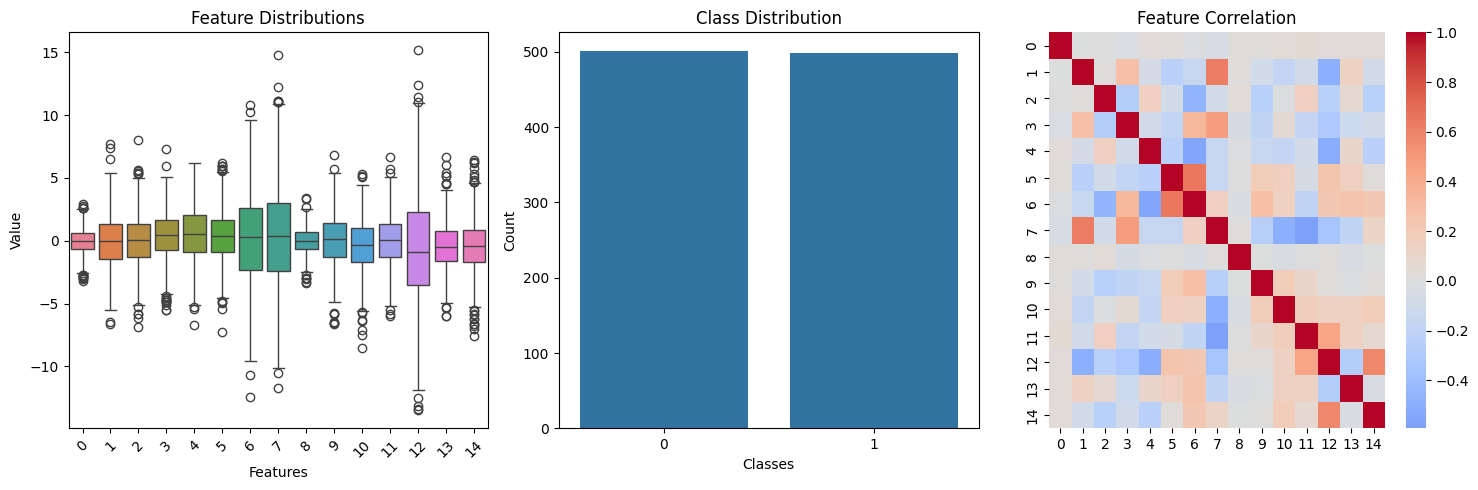

Epoch 0: Train Loss = 0.6867, Val Loss = 0.5964
Epoch 20: Train Loss = 0.2618, Val Loss = 0.2587
Epoch 40: Train Loss = 0.1835, Val Loss = 0.2562
Epoch 60: Train Loss = 0.1443, Val Loss = 0.2245
Epoch 80: Train Loss = 0.1217, Val Loss = 0.2169
Epoch 100: Train Loss = 0.0970, Val Loss = 0.2262
Epoch 120: Train Loss = 0.0895, Val Loss = 0.2303
Epoch 140: Train Loss = 0.1205, Val Loss = 0.2283
Epoch 160: Train Loss = 0.1066, Val Loss = 0.2347
Epoch 180: Train Loss = 0.1112, Val Loss = 0.2281


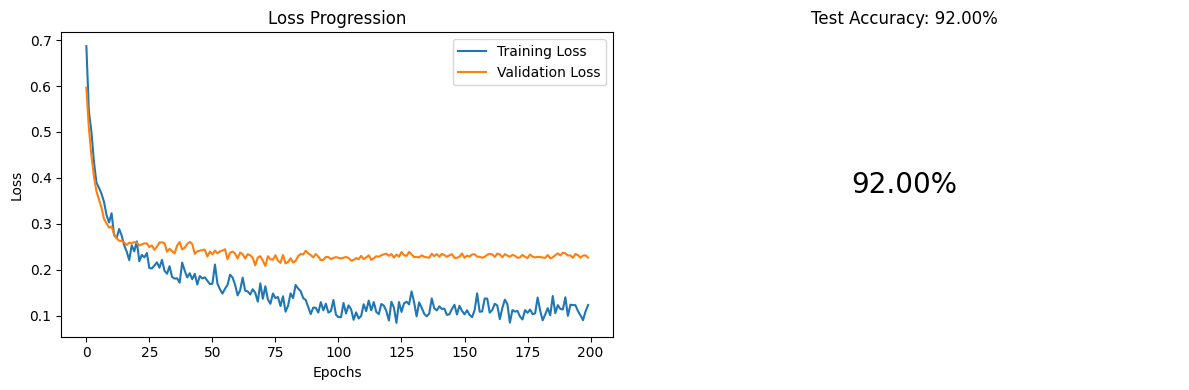

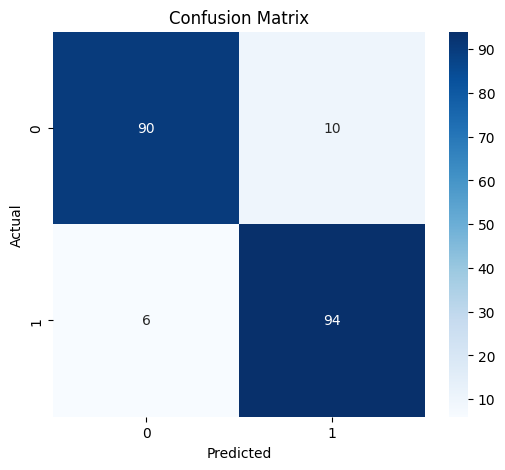

In [128]:
def main():
    # Generate dataset
    X, y = generate_complex_dataset()
    
    # Visualize dataset characteristics
    visualize_dataset(X, y)
    
    # Preprocess data
    preprocessor = DataPreprocessor()
    datasets = preprocessor.preprocess(X, y)
    
    # Initialize model
    model = FlexibleNeuralNetwork(
        input_size=X.shape[1], 
        hidden_layers=[64, 32], 
        dropout_rate=0.3
    )
    
    # Train and evaluate
    training_history = train_and_evaluate(model, datasets)
    
    # Visualize results
    plot_training_dynmics(training_history)
    plot_confusion_matrix(model, datasets)

# Run the entire workflow
if __name__ == '__main__':
    main()


Training with activation: ReLU
Epoch 0: Train Loss = 0.7220, Val Loss = 0.6048
Epoch 20: Train Loss = 0.2349, Val Loss = 0.2713
Epoch 40: Train Loss = 0.1763, Val Loss = 0.2481
Epoch 60: Train Loss = 0.1564, Val Loss = 0.2315
Epoch 80: Train Loss = 0.1794, Val Loss = 0.2260
Test Accuracy with ReLU: 91.00%

Training with activation: Tanh
Epoch 0: Train Loss = 0.6657, Val Loss = 0.5975
Epoch 20: Train Loss = 0.3887, Val Loss = 0.4439
Epoch 40: Train Loss = 0.3381, Val Loss = 0.3298
Epoch 60: Train Loss = 0.2806, Val Loss = 0.2742
Epoch 80: Train Loss = 0.2550, Val Loss = 0.2437
Test Accuracy with Tanh: 90.00%

Training with activation: Sigmoid
Epoch 0: Train Loss = 0.6187, Val Loss = 0.6699
Epoch 20: Train Loss = 0.4349, Val Loss = 0.4931
Epoch 40: Train Loss = 0.3881, Val Loss = 0.4302
Epoch 60: Train Loss = 0.3478, Val Loss = 0.3869
Epoch 80: Train Loss = 0.3233, Val Loss = 0.3225
Test Accuracy with Sigmoid: 89.00%

Training with activation: LeakyReLU
Epoch 0: Train Loss = 0.7512, Val 

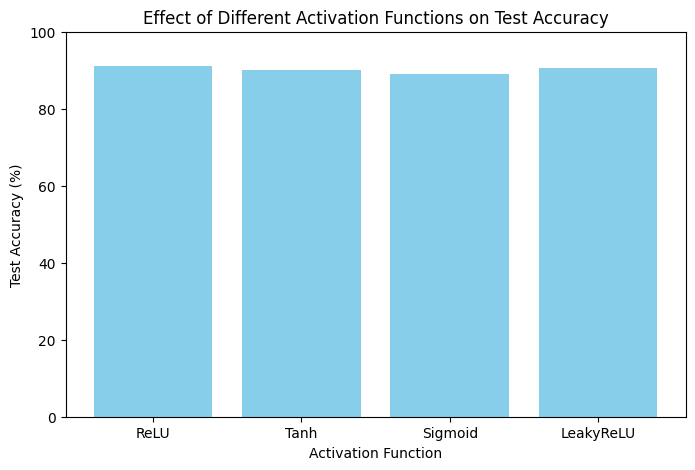

In [130]:
# New cell: Experiment with different activation functions

import torch.nn as nn
import copy

def experiment_with_activation_functions():
    """
    Train the FlexibleNeuralNetwork using different activation functions to observe
    their effect on performance.
    """
    # Generate complex dataset
    X, y = generate_complex_dataset(n_samples=1000, n_features=15, n_classes=2, 
                                      class_separation=0.8, random_state=42)
    
    # Preprocess dataset
    preprocessor = DataPreprocessor()
    datasets = preprocessor.preprocess(X, y)
    
    # Define a list of activation functions to test
    activations = {
        "ReLU": nn.ReLU(),
        "Tanh": nn.Tanh(),
        "Sigmoid": nn.Sigmoid(),
        "LeakyReLU": nn.LeakyReLU()
    }
    
    results = {}

    for act_name, act_fn in activations.items():
        print(f"Training with activation: {act_name}")
        # Initialize a new model with the selected activation function
        model = FlexibleNeuralNetwork(
            input_size=X.shape[1], 
            hidden_layers=[64, 32], 
            activation=act_fn, 
            dropout_rate=0.3
        )
        # Train the model (epochs set to 100 for demo purposes)
        history = train_and_evaluate(model, datasets, learning_rate=0.001, epochs=100)
        results[act_name] = history['test_accuracy']
        print(f"Test Accuracy with {act_name}: {history['test_accuracy']*100:.2f}%\n")
    
    # Plot the test accuracies for comparison
    import matplotlib.pyplot as plt
    act_names = list(results.keys())
    acc_values = [results[act] * 100 for act in act_names]
    
    plt.figure(figsize=(8, 5))
    plt.bar(act_names, acc_values, color='skyblue')
    plt.xlabel("Activation Function")
    plt.ylabel("Test Accuracy (%)")
    plt.title("Effect of Different Activation Functions on Test Accuracy")
    plt.ylim(0, 100)
    plt.show()

# Run the experiment function for demonstration
experiment_with_activation_functions()

Training with architecture: Small [32]
Epoch 0: Train Loss = 0.7345, Val Loss = 0.6400
Epoch 20: Train Loss = 0.3321, Val Loss = 0.3568
Epoch 40: Train Loss = 0.2566, Val Loss = 0.2897
Epoch 60: Train Loss = 0.2082, Val Loss = 0.2771
Epoch 80: Train Loss = 0.1966, Val Loss = 0.2615
Test Accuracy with Small [32]: 89.00%
Training time for Small [32]: 1.35 seconds

Training with architecture: Medium [64, 32]
Epoch 0: Train Loss = 0.6086, Val Loss = 0.5954
Epoch 20: Train Loss = 0.2281, Val Loss = 0.2616
Epoch 40: Train Loss = 0.1947, Val Loss = 0.2254
Epoch 60: Train Loss = 0.1384, Val Loss = 0.2379
Epoch 80: Train Loss = 0.1658, Val Loss = 0.2365
Test Accuracy with Medium [64, 32]: 91.50%
Training time for Medium [64, 32]: 1.86 seconds

Training with architecture: Large [128, 64, 32]
Epoch 0: Train Loss = 0.6475, Val Loss = 0.5983
Epoch 20: Train Loss = 0.2010, Val Loss = 0.2405
Epoch 40: Train Loss = 0.1432, Val Loss = 0.2506
Epoch 60: Train Loss = 0.1414, Val Loss = 0.2535
Epoch 80: Tr

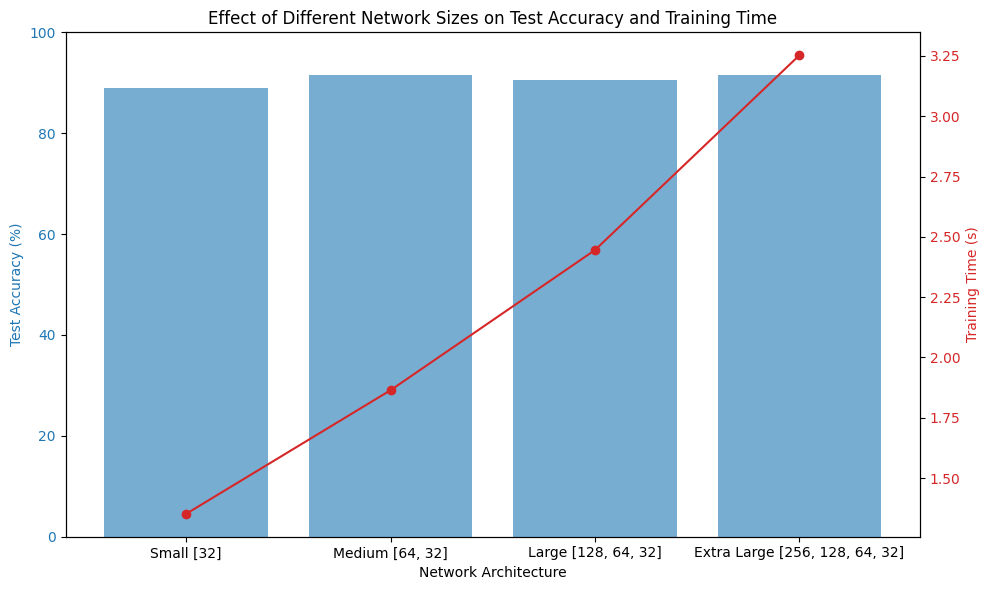

In [133]:
# New cell: Experiment with different neural network sizes (with timers, ReLU, and complex architectures)

import time
import torch.nn as nn

def experiment_with_network_sizes():
    """
    Train the FlexibleNeuralNetwork using various hidden layer configurations
    to observe the effect of model size on performance, while timing the training.
    Uses ReLU activation for all experiments.
    """
    X, y = generate_complex_dataset()
    preprocessor = DataPreprocessor()
    datasets = preprocessor.preprocess(X, y)
    
    # Define various architectures including larger/complex ones
    architectures = {
        "Small [32]": [32],
        "Medium [64, 32]": [64, 32],
        "Large [128, 64, 32]": [128, 64, 32],
        "Extra Large [256, 128, 64, 32]": [256, 128, 64, 32]
    }
    
    results = {}
    
    for arch_name, hidden_layers in architectures.items():
        print(f"Training with architecture: {arch_name}")
        start_time = time.time()
        
        model = FlexibleNeuralNetwork(
            input_size=X.shape[1],
            hidden_layers=hidden_layers,
            activation=nn.ReLU(),  # use ReLU activation
            dropout_rate=0.3
        )
        history = train_and_evaluate(model, datasets, learning_rate=0.001, epochs=100)
        elapsed_time = time.time() - start_time
        
        results[arch_name] = {
            "accuracy": history['test_accuracy'],
            "time": elapsed_time
        }
        print(f"Test Accuracy with {arch_name}: {history['test_accuracy']*100:.2f}%")
        print(f"Training time for {arch_name}: {elapsed_time:.2f} seconds\n")
    
    # Plot the test accuracies and training times for comparison
    import matplotlib.pyplot as plt
    fig, ax1 = plt.subplots(figsize=(10, 6))
    
    arch_names = list(results.keys())
    acc_values = [results[arch]["accuracy"]*100 for arch in arch_names]
    times = [results[arch]["time"] for arch in arch_names]
    
    color = 'tab:blue'
    ax1.set_xlabel("Network Architecture")
    ax1.set_ylabel("Test Accuracy (%)", color=color)
    ax1.bar(arch_names, acc_values, color=color, alpha=0.6, label="Test Accuracy")
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_ylim(0, 100)
    
    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel("Training Time (s)", color=color)
    ax2.plot(arch_names, times, color=color, marker='o', label="Training Time")
    ax2.tick_params(axis='y', labelcolor=color)
    
    plt.title("Effect of Different Network Sizes on Test Accuracy and Training Time")
    fig.tight_layout()
    plt.show()

# Run the network sizes experiment
experiment_with_network_sizes()

Training with learning rate: Very Low (1e-6)
Epoch 0: Train Loss = 0.7793, Val Loss = 0.7167
Epoch 20: Train Loss = 0.7326, Val Loss = 0.7722
Epoch 40: Train Loss = 0.7849, Val Loss = 0.7677
Epoch 60: Train Loss = 0.7428, Val Loss = 0.7713
Epoch 80: Train Loss = 0.7562, Val Loss = 0.7677
Test Accuracy with Very Low (1e-6): 57.00%
Training time for learning rate Very Low (1e-6): 1.89 seconds

Training with learning rate: Extra Low (1e-5)
Epoch 0: Train Loss = 0.7012, Val Loss = 0.7024
Epoch 20: Train Loss = 0.6560, Val Loss = 0.6854
Epoch 40: Train Loss = 0.6171, Val Loss = 0.6551
Epoch 60: Train Loss = 0.5925, Val Loss = 0.6350
Epoch 80: Train Loss = 0.5895, Val Loss = 0.6114
Test Accuracy with Extra Low (1e-5): 72.50%
Training time for learning rate Extra Low (1e-5): 1.88 seconds

Training with learning rate: Low (0.0001)
Epoch 0: Train Loss = 0.7939, Val Loss = 0.6725
Epoch 20: Train Loss = 0.4777, Val Loss = 0.4919
Epoch 40: Train Loss = 0.4035, Val Loss = 0.4092
Epoch 60: Train Los

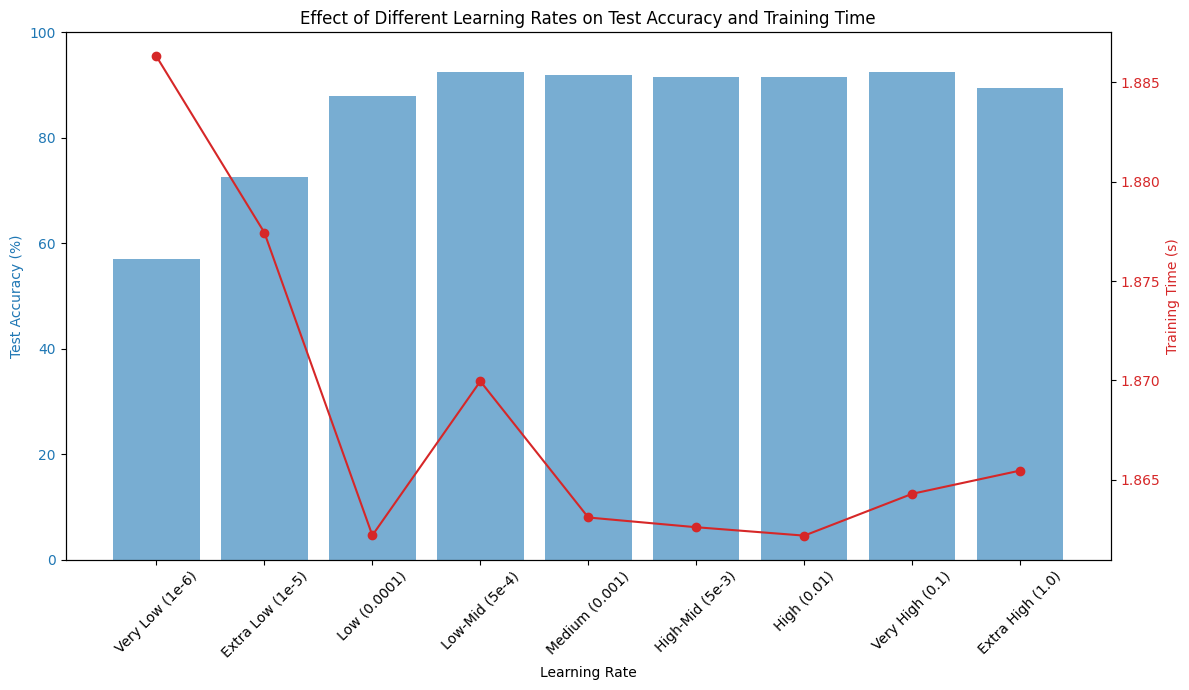

In [136]:
# New cell: Experiment with different learning rates (expanded with additional rates and timers)

import time

def experiment_with_learning_rates():
    """
    Train the FlexibleNeuralNetwork using various learning rates
    to observe the effect on convergence and performance.
    Measures and prints training time for each configuration.
    """
    X, y = generate_complex_dataset()
    preprocessor = DataPreprocessor()
    datasets = preprocessor.preprocess(X, y)
    
    # Expanded learning rate configurations:
    learning_rates = {
        "Very Low (1e-6)": 1e-6,
        "Extra Low (1e-5)": 1e-5,
        "Low (0.0001)": 1e-4,
        "Low-Mid (5e-4)": 5e-4,
        "Medium (0.001)": 1e-3,
        "High-Mid (5e-3)": 5e-3,
        "High (0.01)": 1e-2,
        "Very High (0.1)": 1e-1,
        "Extra High (1.0)": 1.0
    }
    
    results = {}
    
    for lr_name, lr_value in learning_rates.items():
        print(f"Training with learning rate: {lr_name}")
        start_time = time.time()
        model = FlexibleNeuralNetwork(
            input_size=X.shape[1],
            hidden_layers=[64, 32],
            dropout_rate=0.3
        )
        history = train_and_evaluate(model, datasets, learning_rate=lr_value, epochs=100)
        elapsed_time = time.time() - start_time
        results[lr_name] = {
            "accuracy": history['test_accuracy'],
            "time": elapsed_time
        }
        print(f"Test Accuracy with {lr_name}: {history['test_accuracy']*100:.2f}%")
        print(f"Training time for learning rate {lr_name}: {elapsed_time:.2f} seconds\n")
    
    # Plot the test accuracies and training times for comparison
    import matplotlib.pyplot as plt
    fig, ax1 = plt.subplots(figsize=(12, 7))
    
    lr_names = list(results.keys())
    acc_values = [results[lr]["accuracy"]*100 for lr in lr_names]
    times = [results[lr]["time"] for lr in lr_names]
    
    color = 'tab:blue'
    ax1.set_xlabel("Learning Rate")
    ax1.set_ylabel("Test Accuracy (%)", color=color)
    ax1.bar(lr_names, acc_values, color=color, alpha=0.6, label="Test Accuracy")
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_ylim(0, 100)
    plt.xticks(rotation=45)
    
    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel("Training Time (s)", color=color)
    ax2.plot(lr_names, times, color=color, marker='o', label="Training Time")
    ax2.tick_params(axis='y', labelcolor=color)
    
    plt.title("Effect of Different Learning Rates on Test Accuracy and Training Time")
    fig.tight_layout()
    plt.show()

# Run the learning rates experiment
experiment_with_learning_rates()

# How to Observe Overfitting in the Plots

- **Training vs. Validation Loss:**  
  In the loss curves, you should see that the training loss continues to decrease and reaches very low values, while the validation loss stops decreasing or even begins to increase after a certain point. This divergence indicates that the model is fitting the training data too closely and is not generalizing well to unseen data.

- **Loss Gap Plot:**  
  The loss gap (i.e., the difference between validation and training losses) is an indicator of overfitting. A widening gap over the epochs shows that the model's performance on the training set is improving much more than on the validation set.

- **Model Accuracy (if plotted):**  
  Although not shown in this particular cell, if you were to plot training and validation accuracy, you would typically notice that the training accuracy keeps improving and possibly reaches near-perfect performance, while the validation accuracy plateaus or declines, further reinforcing the presence of overfitting.

Epoch 0: Train Loss = 0.5625, Val Loss = 0.6125
Epoch 20: Train Loss = 0.0640, Val Loss = 0.6807


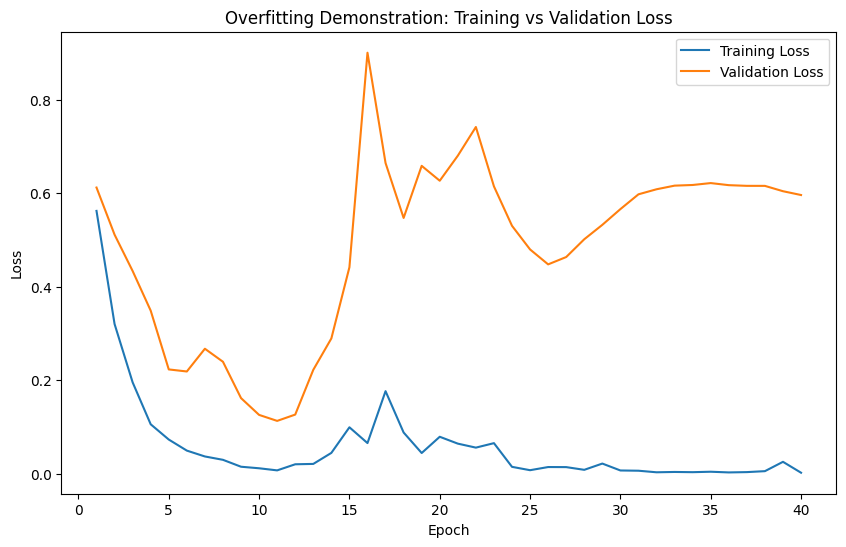

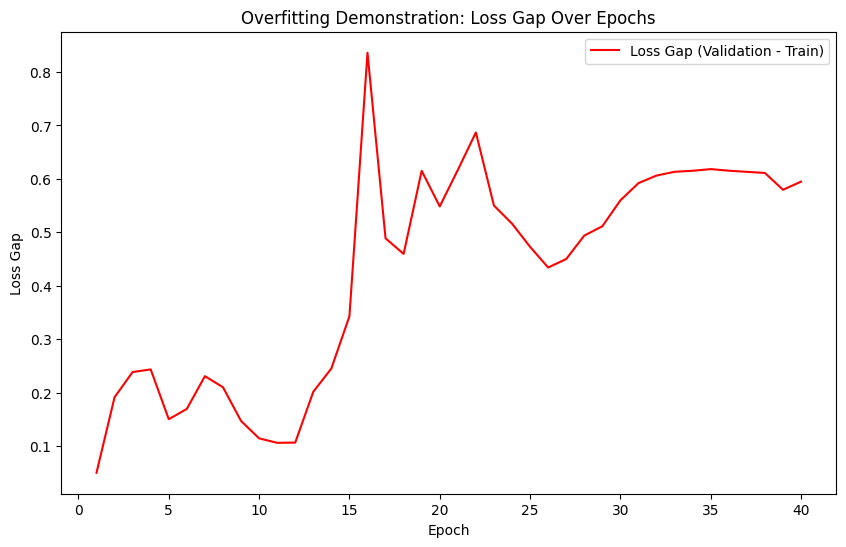

Test Accuracy: 90.00%


In [172]:
# New cell: Demonstration of Overfitting with Accuracy

import torch.nn as nn
import matplotlib.pyplot as plt

def experiment_overfitting():
    """
    Demonstrate overfitting by training on a small dataset with a complex model,
    no dropout, and many epochs. Expects the train_and_evaluate function to
    return a history dictionary containing "train_losses", "val_losses", and "test_accuracy".
    Plots both the loss curves and the loss gap (error) between training and validation losses,
    and prints the test accuracy at the end.
    """
    # Generate a small dataset to encourage overfitting
    X, y = generate_complex_dataset(n_samples=200, n_features=15, n_classes=2)
    preprocessor = DataPreprocessor()
    datasets = preprocessor.preprocess(X, y)
    
    # Create a complex model with dropout disabled to exacerbate overfitting
    model = FlexibleNeuralNetwork(
        input_size=X.shape[1],
        hidden_layers=[128, 64, 32],
        activation=nn.ReLU(),
        dropout_rate=0.0  # No dropout regularization
    )
    
    epochs = 40
    # Train the model and capture loss history
    history = train_and_evaluate(model, datasets, learning_rate=0.01, epochs=epochs)
    
    train_loss_history = history.get("train_losses", [])
    test_loss_history = history.get("val_losses", [])
    
    if len(train_loss_history) == epochs and len(test_loss_history) == epochs:
        # Plot the training and validation loss curves to visualize overfitting
        plt.figure(figsize=(10, 6))
        plt.plot(range(1, epochs + 1), train_loss_history, label="Training Loss")
        plt.plot(range(1, epochs + 1), test_loss_history, label="Validation Loss")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.title("Overfitting Demonstration: Training vs Validation Loss")
        plt.legend()
        plt.show()
        
        # Plot the difference between validation and training losses as an error gap
        loss_gap = [val - train for train, val in zip(train_loss_history, test_loss_history)]
        plt.figure(figsize=(10, 6))
        plt.plot(range(1, epochs + 1), loss_gap, label="Loss Gap (Validation - Train)", color="red")
        plt.xlabel("Epoch")
        plt.ylabel("Loss Gap")
        plt.title("Overfitting Demonstration: Loss Gap Over Epochs")
        plt.legend()
        plt.show()
        
        # Print test accuracy computed in train_and_evaluate
        if "test_accuracy" in history:
            print(f"Test Accuracy: {history['test_accuracy']*100:.2f}%")
        else:
            print("Test accuracy not computed.")
    else:
        print("Loss history data unavailable. Please ensure that train_and_evaluate() "
              "returns 'train_losses' and 'val_losses' for each epoch.")

# Run the overfitting experiment
experiment_overfitting()

Epoch 0: Train Loss = 0.7985, Val Loss = 0.6598
Epoch 20: Train Loss = 0.2118, Val Loss = 0.2832


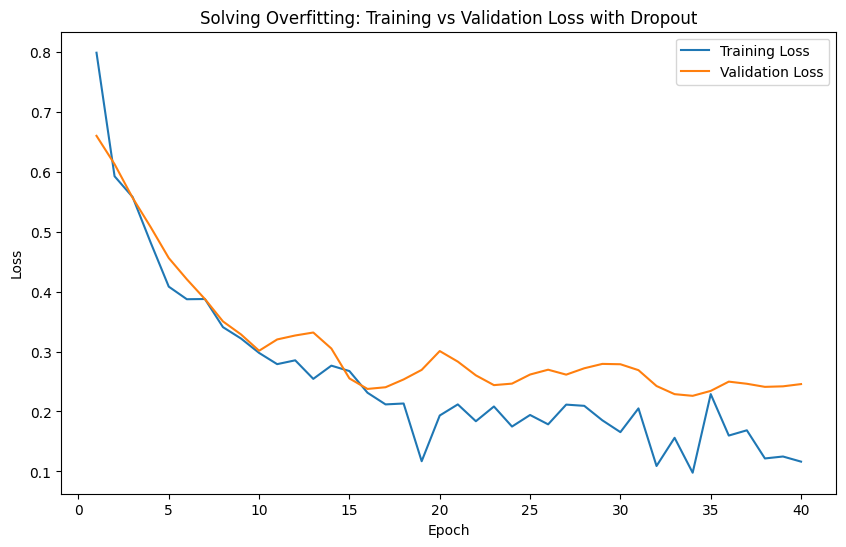

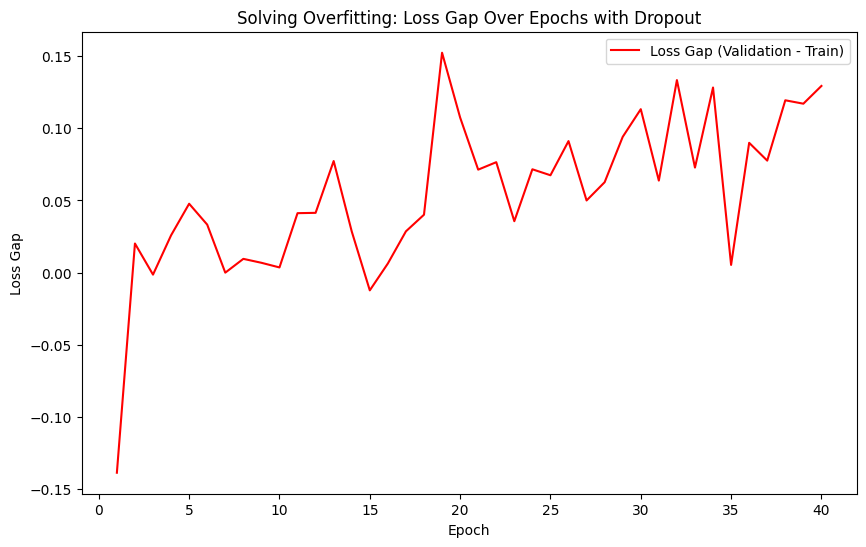

In [162]:
# New cell: Demonstration of Solving Overfitting via Dropout

import torch.nn as nn
import matplotlib.pyplot as plt

def experiment_solve_overfitting():
    """
    Demonstrate overcoming overfitting by training on a small dataset with a regularized model.
    This example enables dropout (and can be extended with early stopping or weight decay)
    to help reduce overfitting. Expects the train_and_evaluate function to return a history
    dictionary containing "train_losses" and "val_losses" lists.
    """
    # Generate a small dataset
    X, y = generate_complex_dataset(n_samples=200, n_features=15, n_classes=2)
    preprocessor = DataPreprocessor()
    datasets = preprocessor.preprocess(X, y)
    
    # Create a model with dropout enabled to help mitigate overfitting
    model = FlexibleNeuralNetwork(
        input_size=X.shape[1],
        hidden_layers=[128, 64, 32],
        activation=nn.ReLU(),
        dropout_rate=0.5  # Enable dropout as a regularization technique
    )
    
    epochs = 40
    # Train the model and capture the loss history
    history = train_and_evaluate(model, datasets, learning_rate=0.01, epochs=epochs)
    
    train_loss_history = history.get("train_losses", [])
    test_loss_history = history.get("val_losses", [])
    
    if len(train_loss_history) == epochs and len(test_loss_history) == epochs:
        # Plot the training and validation loss curves after applying dropout
        plt.figure(figsize=(10, 6))
        plt.plot(range(1, epochs + 1), train_loss_history, label="Training Loss")
        plt.plot(range(1, epochs + 1), test_loss_history, label="Validation Loss")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.title("Solving Overfitting: Training vs Validation Loss with Dropout")
        plt.legend()
        plt.show()
        
        # Plot the difference between validation and training losses as an error gap
        loss_gap = [val - train for train, val in zip(train_loss_history, test_loss_history)]
        plt.figure(figsize=(10, 6))
        plt.plot(range(1, epochs + 1), loss_gap, label="Loss Gap (Validation - Train)", color="red")
        plt.xlabel("Epoch")
        plt.ylabel("Loss Gap")
        plt.title("Solving Overfitting: Loss Gap Over Epochs with Dropout")
        plt.legend()
        plt.show()
    else:
        print("Loss history data unavailable. Please ensure that train_and_evaluate() "
              "returns 'train_losses' and 'val_losses' for each epoch.")

# Run the experiment to demonstrate mitigating overfitting
experiment_solve_overfitting()

Epoch 0: Train Loss = 0.6316, Val Loss = 0.6778
Epoch 20: Train Loss = 0.0327, Val Loss = 0.1607


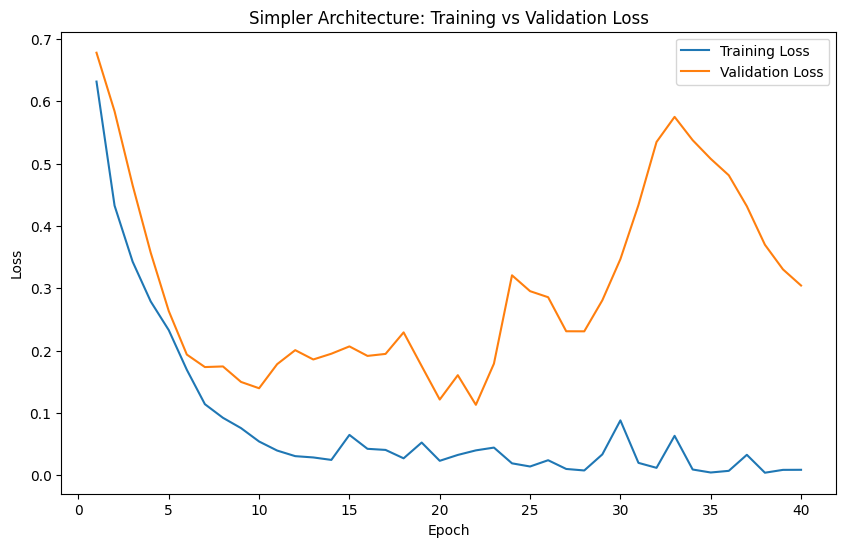

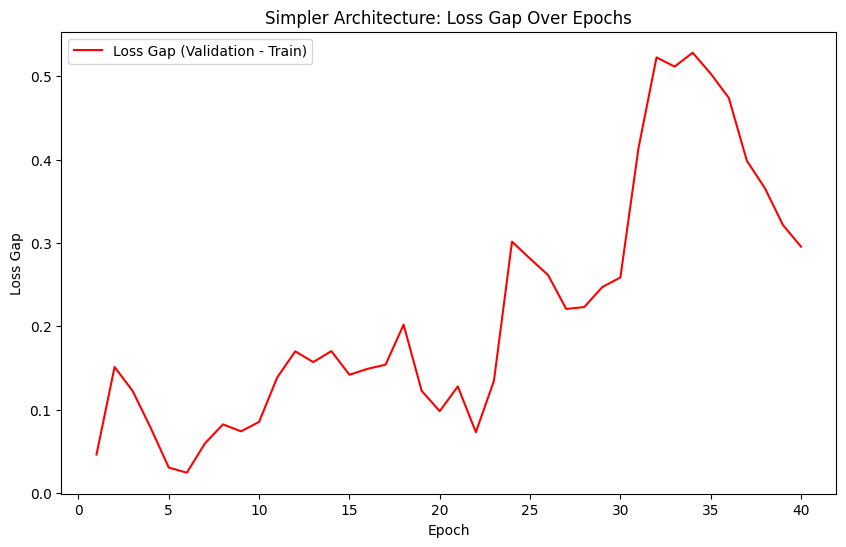

Test Accuracy: 92.50%


In [171]:
# New cell: Demonstration of Solving Overfitting via Simpler Architecture and Fewer Epochs with Accuracy (Updated)

import torch.nn as nn
import matplotlib.pyplot as plt

def experiment_solve_overfitting_simple():
    """
    Mitigate overfitting by using a simpler model architecture and fewer training epochs.
    Expects the train_and_evaluate function to return a history dictionary containing
    "train_losses", "val_losses", and "test_accuracy". Test accuracy is computed using the 
    'test' data split from the preprocessor.
    """
    # Generate a small dataset
    X, y = generate_complex_dataset(n_samples=200, n_features=15, n_classes=2)
    preprocessor = DataPreprocessor()
    datasets = preprocessor.preprocess(X, y)
    
    # Create a simpler model: fewer hidden layers and neurons, no dropout
    model = FlexibleNeuralNetwork(
        input_size=X.shape[1],
        hidden_layers=[32, 16],  # Simplified architecture
        activation=nn.ReLU(),
        dropout_rate=0.0  # No dropout
    )
    
    # Reduce the number of epochs to help prevent overfitting
    epochs = 40
    history = train_and_evaluate(model, datasets, learning_rate=0.01, epochs=epochs)
    
    train_loss_history = history.get("train_losses", [])
    test_loss_history = history.get("val_losses", [])
    
    if len(train_loss_history) == epochs and len(test_loss_history) == epochs:
        # Plot training and validation loss curves
        plt.figure(figsize=(10, 6))
        plt.plot(range(1, epochs + 1), train_loss_history, label="Training Loss")
        plt.plot(range(1, epochs + 1), test_loss_history, label="Validation Loss")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.title("Simpler Architecture: Training vs Validation Loss")
        plt.legend()
        plt.show()
        
        # Plot loss gap between training and validation losses
        loss_gap = [val - train for train, val in zip(train_loss_history, test_loss_history)]
        plt.figure(figsize=(10, 6))
        plt.plot(range(1, epochs + 1), loss_gap, label="Loss Gap (Validation - Train)", color="red")
        plt.xlabel("Epoch")
        plt.ylabel("Loss Gap")
        plt.title("Simpler Architecture: Loss Gap Over Epochs")
        plt.legend()
        plt.show()
        
        # Print test accuracy computed in train_and_evaluate
        if "test_accuracy" in history:
            print(f"Test Accuracy: {history['test_accuracy']*100:.2f}%")
        else:
            print("Test accuracy not computed.")
    else:
        print("Loss history data unavailable. Please ensure that train_and_evaluate() "
              "returns 'train_losses' and 'val_losses' for each epoch.")

# Run the experiment to demonstrate mitigating overfitting
experiment_solve_overfitting_simple()